> # Dengue Prediction Using Ensemble models
**Team Members:** 
    
    1. A.K.M. Masudur Rahman (220201065)
    2. MST. Sumya Jafrin (220201013)

# **Importing Libraries**

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import xgboost as xgb
from sklearn.ensemble import StackingClassifier

# Load Data and Reveal Data

In [113]:
# Load dataset
data = pd.read_csv('/kaggle/input/dengue-augmented-dataset/dengue_augmented_combined.csv')

# Display the first few rows
data.head(10)

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45.0,0.0,0.0,0.0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17.0,0.0,0.0,1.0,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29.0,0.0,0.0,0.0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63.0,1.0,1.0,0.0,Motijheel,Developed,Other,Dhaka,1
4,Male,22.0,0.0,0.0,0.0,Gendaria,Undeveloped,Building,Dhaka,0
5,Female,36.0,0.0,0.0,1.0,Dhanmondi,Developed,Other,Dhaka,0
6,Female,15.0,0.0,0.0,1.0,New Market,Undeveloped,Building,Dhaka,0
7,Male,26.0,0.0,0.0,0.0,New Market,Developed,Other,Dhaka,0
8,Female,31.0,0.0,0.0,1.0,Dhanmondi,Undeveloped,Tinshed,Dhaka,0
9,Female,10.0,0.0,0.0,1.0,Sher-e-Bangla Nagar,Developed,Tinshed,Dhaka,0


# Exploratory Data Analysis (EDA)

In [114]:
# Check for missing values
data.isnull().sum()

Gender       0
Age          0
NS1          0
IgG          0
IgM          0
Area         0
AreaType     0
HouseType    0
District     0
Outcome      0
dtype: int64

In [115]:
# Basic statistics of the dataset
data.describe()

,Age,NS1,IgG,IgM,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,35.931574,0.513213,0.523060,0.478267,0.533000
std,16.454877,0.458892,0.456708,0.455823,0.499035
min,7.438417,0.000000,0.000000,0.000000,0.000000
25%,21.643555,0.000000,0.000000,0.000000,0.000000
50%,36.657574,0.568151,0.581840,0.405178,1.000000
75%,49.856232,1.000000,1.000000,1.000000,1.000000
max,65.296180,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

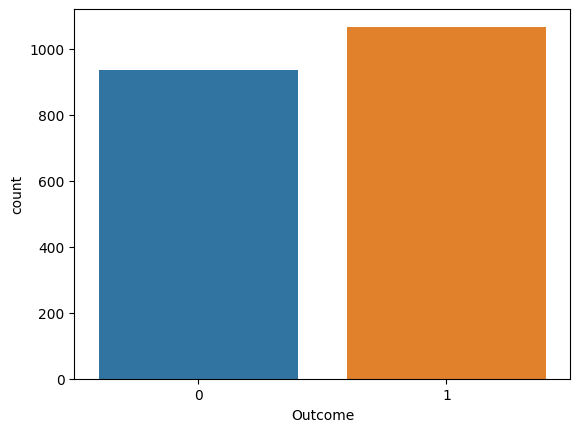

In [116]:
# Visualize class distribution (Outcome variable)
sns.countplot(x='Outcome', data=data)

In [117]:
# One-Hot Encoding for categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,Age,NS1,IgG,IgM,Outcome,Gender_Male,Area_Badda,Area_Banasree,Area_Bangshal,Area_Biman Bandar,...,Area_Rampura,Area_Sabujbagh,Area_Shahbagh,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,AreaType_Undeveloped,HouseType_Other,HouseType_Tinshed
0,45.0,0.0,0.0,0.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,17.0,0.0,0.0,1.0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,29.0,0.0,0.0,0.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,63.0,1.0,1.0,0.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,22.0,0.0,0.0,0.0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [118]:
# Calculate correlation
corr = data_encoded.corr()
#print(corr)

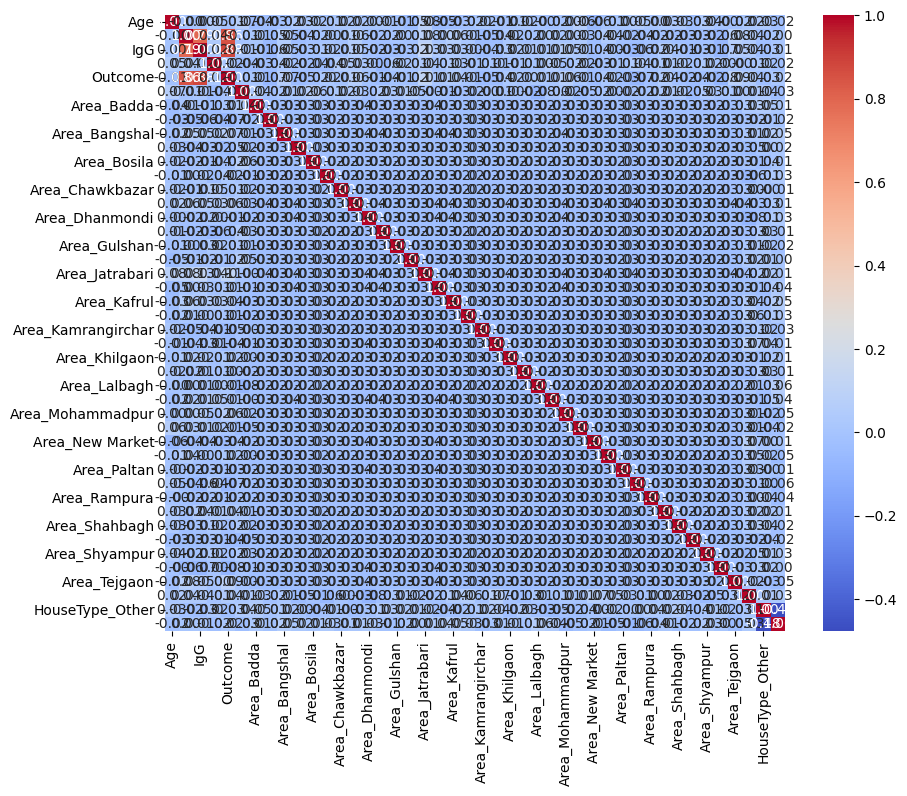

In [119]:
# Visualize the correlation between features
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Feature Engineering

In [120]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Area'] = label_encoder.fit_transform(data['Area'])
data['AreaType'] = label_encoder.fit_transform(data['AreaType'])
data['HouseType'] = label_encoder.fit_transform(data['HouseType'])
data['District'] = label_encoder.fit_transform(data['District'])
data.head(5)


,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,0,45.0,0.0,0.0,0.0,22,1,0,0,0
1,1,17.0,0.0,0.0,1.0,7,0,0,0,0
2,0,29.0,0.0,0.0,0.0,27,1,1,0,0
3,0,63.0,1.0,1.0,0.0,24,0,1,0,1
4,1,22.0,0.0,0.0,0.0,10,1,0,0,0


In [121]:
# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [122]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

In [123]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Train Models

In [124]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [125]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [126]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [127]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [128]:
# SVM (Support Vector Machine)

svm = SVC(random_state=42, probability=True)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [129]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1024, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1024, random_state=42)

In [130]:
import xgboost as xgb
from xgboost import XGBClassifier

# XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boost Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [132]:
from catboost import CatBoostClassifier

# CatBoost Classifier
cat = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=8,
    eval_metric='Accuracy',
    verbose=0,
    random_state=42
)
cat.fit(X_train, y_train)

In [133]:
from lightgbm import LGBMClassifier

# Light Gradient Boosting Classifier
lgb = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=-1,
    num_leaves=64,
    random_state=42
)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 853, number of negative: 747
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533125 -> initscore=0.132694
[LightGBM] [Info] Start training from score 0.132694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(learning_rate=0.01, n_estimators=200, num_leaves=64,
               random_state=42)

# Model Evaluation

In [134]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]  # works for XGBClassifier & scikit-learn models
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       187
           1       0.95      0.97      0.96       213

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Confusion Matrix for LogisticRegression:
[[177  10]
 [  7 206]]


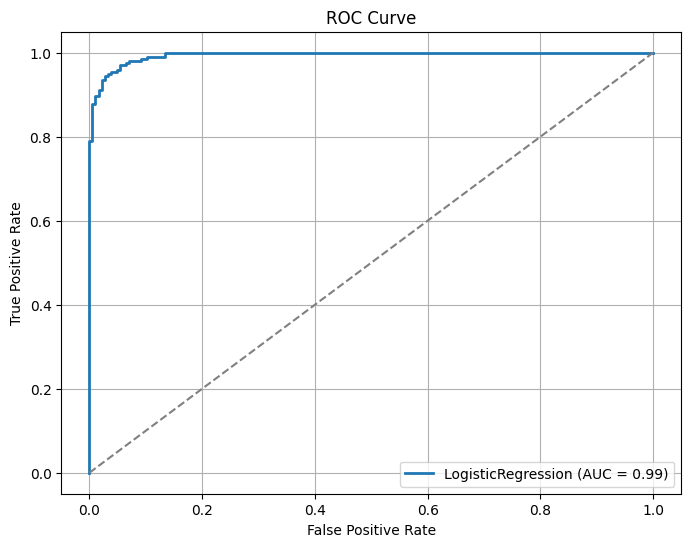

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       187
           1       0.94      0.97      0.95       213

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Confusion Matrix for GaussianNB:
[[174  13]
 [  7 206]]


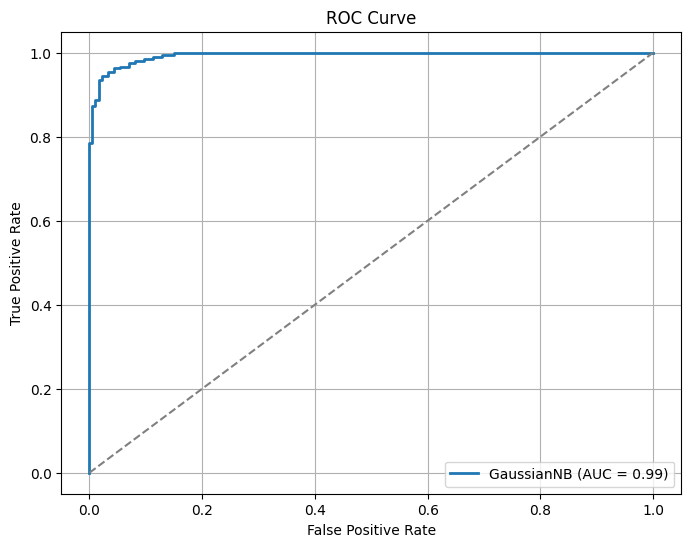

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       187
           1       0.92      0.95      0.94       213

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

Confusion Matrix for DecisionTreeClassifier:
[[170  17]
 [ 11 202]]


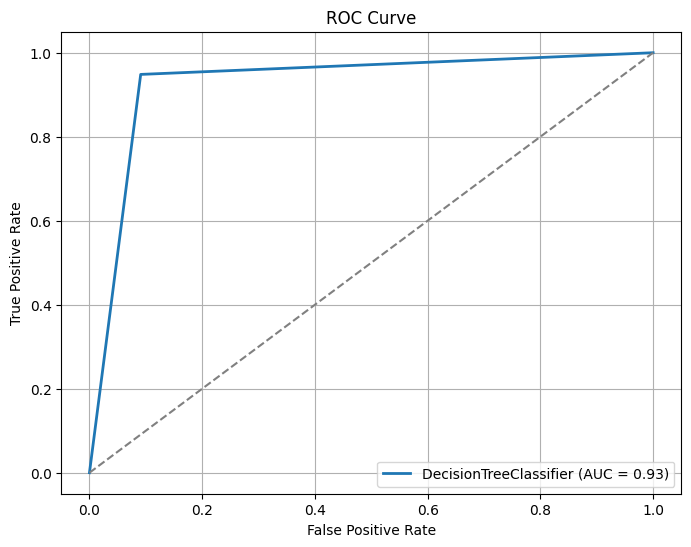

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       187
           1       0.94      0.97      0.95       213

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Confusion Matrix for KNeighborsClassifier:
[[173  14]
 [  7 206]]


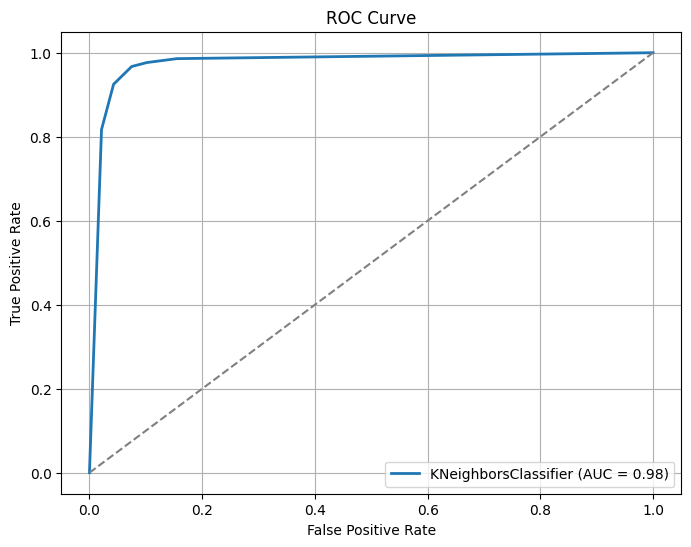

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       187
           1       0.94      0.97      0.95       213

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Confusion Matrix for SVC:
[[174  13]
 [  7 206]]


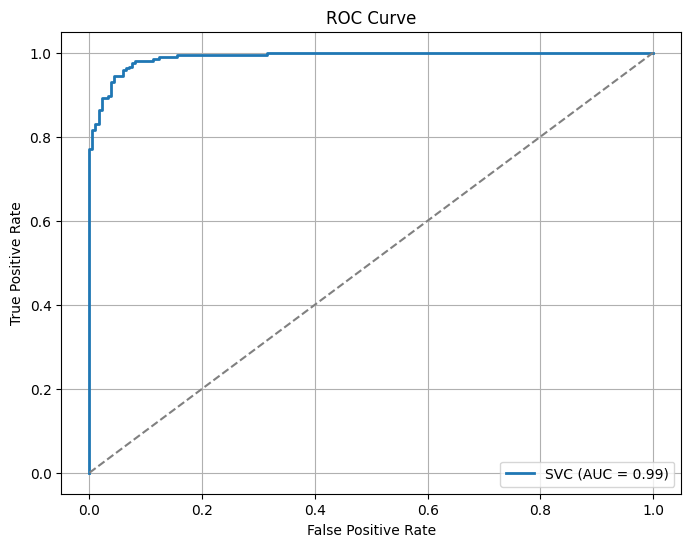

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       187
           1       0.95      0.97      0.96       213

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400

Confusion Matrix for RandomForestClassifier:
[[175  12]
 [  6 207]]


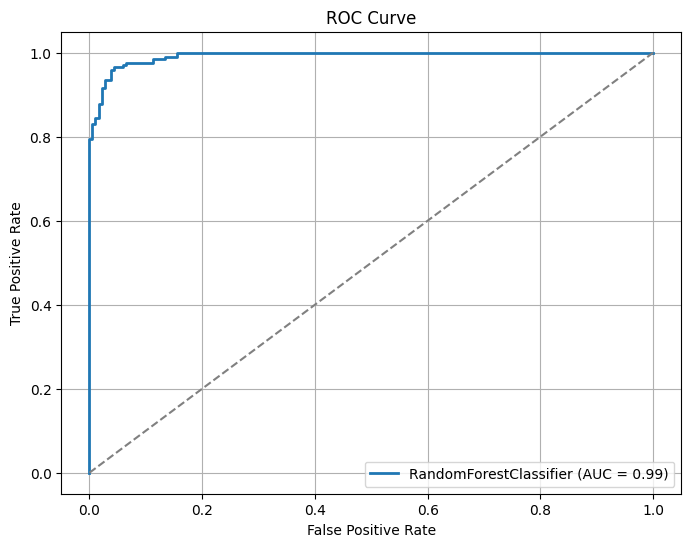

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       187
           1       0.94      0.97      0.95       213

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Confusion Matrix for XGBClassifier:
[[173  14]
 [  7 206]]


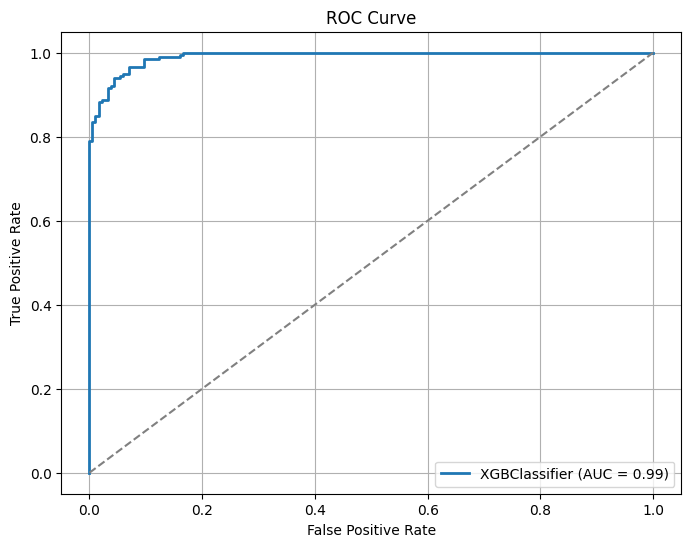

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       187
           1       0.95      0.98      0.96       213

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Confusion Matrix for GradientBoostingClassifier:
[[175  12]
 [  5 208]]


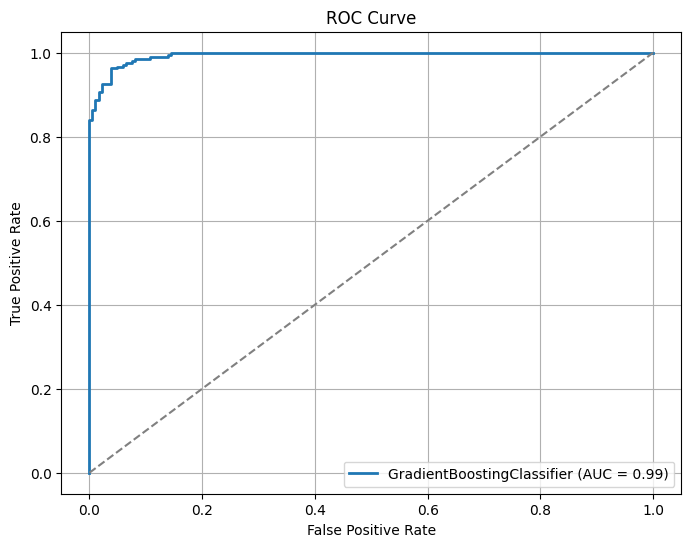

Classification Report for CatBoostClassifier:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       187
           1       0.94      0.96      0.95       213

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

Confusion Matrix for CatBoostClassifier:
[[175  12]
 [  8 205]]


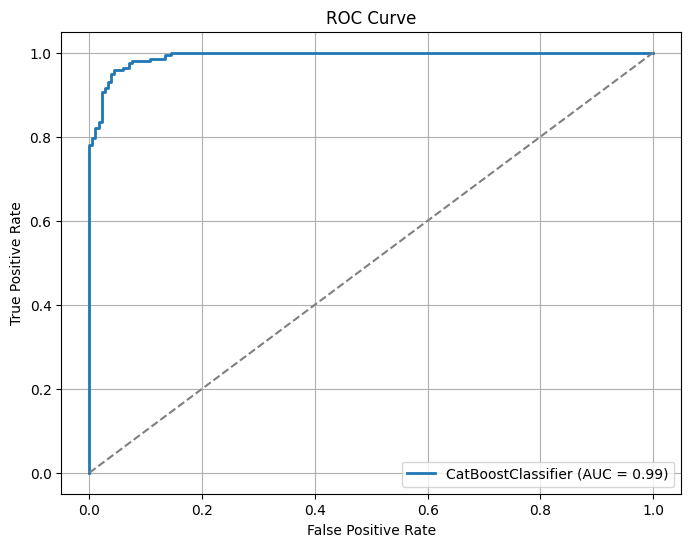

Classification Report for LGBMClassifier:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       187
           1       0.95      0.97      0.96       213

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Confusion Matrix for LGBMClassifier:
[[176  11]
 [  6 207]]


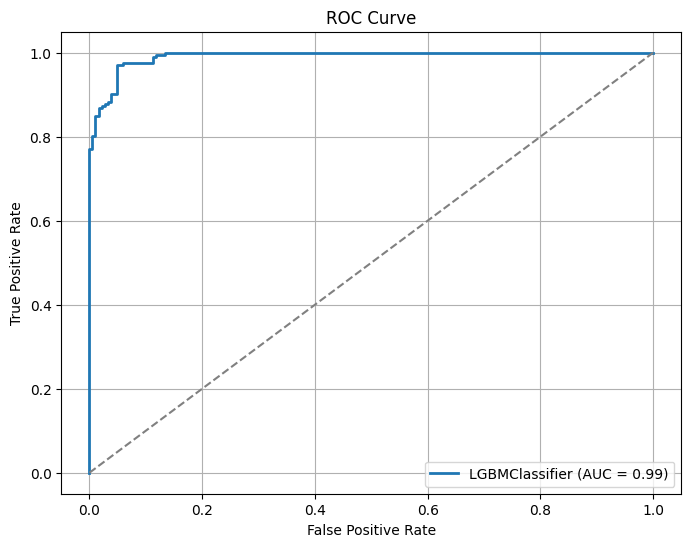

In [135]:
# Evaluate each model
models = [log_reg, nb, dt, knn, svm, rf, xgb_model, gb, cat, lgb]

for model in models:
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix for {model.__class__.__name__}:")
    print(confusion_matrix(y_test, y_pred))
    plot_roc_curve(model, X_test, y_test)

# Ensemble Model

[LightGBM] [Info] Number of positive: 853, number of negative: 747
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533125 -> initscore=0.132694
[LightGBM] [Info] Start training from score 0.132694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

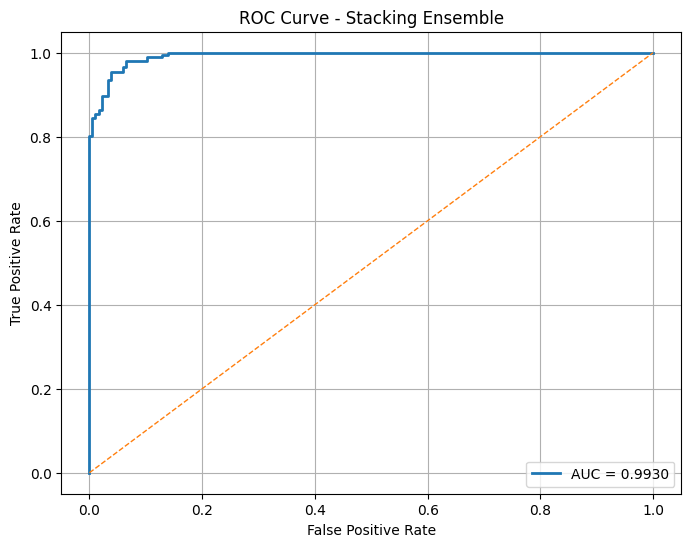

In [136]:
# Define base models
base_models = [
    ('log_reg', LogisticRegression(random_state=42)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=512, max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, iterations=200, learning_rate=0.1, depth=6, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42))
]

# Meta-learner
meta_model = XGBClassifier(
    n_estimators=100, max_depth=3, learning_rate=0.1,
    use_label_encoder=False, eval_metric='logloss', random_state=42
)

# Create stacking ensemble
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# Train stacking ensemble
stack_model.fit(X_train, y_train)

# Predict probabilities
y_prob = stack_model.predict_proba(X_test)[:, 1]

# Threshold tuning to maximize accuracy
best_acc = 0
best_thresh = 0.5
for t in np.arange(0.3, 0.7, 0.01):
    y_pred_thresh = (y_prob >= t).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    if acc > best_acc:
        best_acc = acc
        best_thresh = t

print(f"Optimal threshold: {best_thresh:.2f}, Best Accuracy: {best_acc:.4f}")

# Final predictions using optimal threshold
y_pred_final = (y_prob >= best_thresh).astype(int)


from sklearn.metrics import classification_report

# Accuracy (using final threshold)
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)

print("\n===== Final Evaluation Metrics =====")
print(f"Accuracy:  {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall:    {recall_final:.4f}")
print(f"F1 Score:  {f1_final:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Ensemble')
plt.legend()
plt.grid(True)
plt.show()
